In [1]:
import seaborn as sns
df = sns.load_dataset("penguins")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df.to_csv('/content/drive/MyDrive/machine learning/actividades ml/Proyecto 2 – Parte I (Core)/dataset4.csv')

#EDA

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df[df["sex"].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [ ]:
df = df[~df["bill_length_mm"].isna()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [ ]:
val_1 = df[(df["species"] == "Adelie") & (df["island"] == "Torgersen")]["sex"].mode()[0]
df.loc[(df["species"] == "Adelie") & (df["island"] == "Torgersen") & (df["sex"].isna()), "sex"] = val_1

In [ ]:
val_2 = df[(df["species"] == "Adelie") & (df["island"] == "Dream")]["sex"].mode()[0]
df.loc[(df["species"] == "Adelie") & (df["island"] == "Dream") & (df["sex"].isna()), "sex"] = val_2

In [ ]:
val_3 = df[(df["species"] == "Gentoo") & (df["island"] == "Biscoe")]["sex"].mode()[0]
df.loc[(df["species"] == "Gentoo") & (df["island"] == "Biscoe") & (df["sex"].isna()), "sex"] = val_3

### Visualizaciones

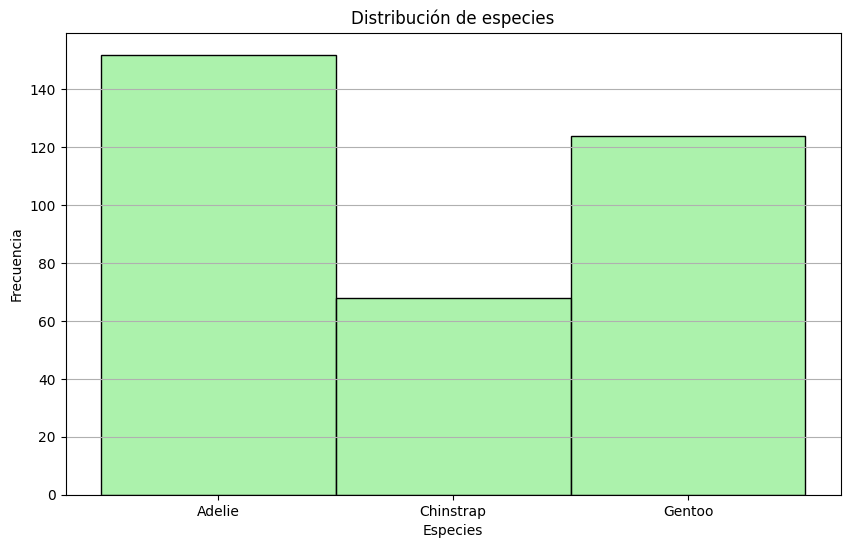

In [18]:
# Histograma de distribución de especies
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x="species", color="lightgreen")
plt.title("Distribución de especies")
plt.xlabel("Especies")
plt.ylabel("Frecuencia")
plt.grid(True, axis="y")
plt.show()

Existe una mayor presencia de especie Adelie, seguido de Gentoo y finalmente Chinstrap, la cual tiene una presencia de menos del 50% que Adelie.

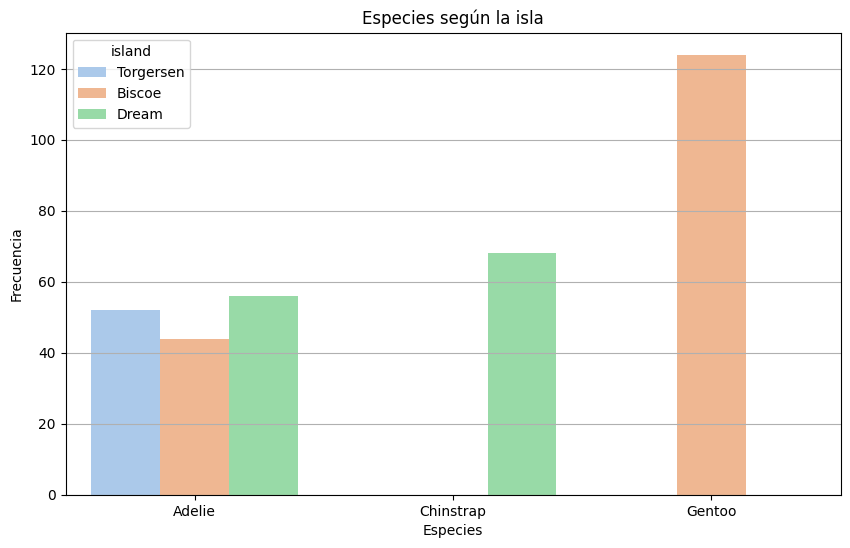

In [17]:
# Gráfico de barra de las especies según la isla
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x="species", hue="island", palette="pastel")
plt.title("Especies según la isla")
plt.xlabel("Especies")
plt.ylabel("Frecuencia")
plt.grid(True, axis="y")
plt.show()

Se observa que la especie Adelie se encuentra presente en las 3 islas, a diferencia de las especies Chinstrap (presente únicamente en la isla Dream) y Gento (presente únicamente en la isla Biscoe)

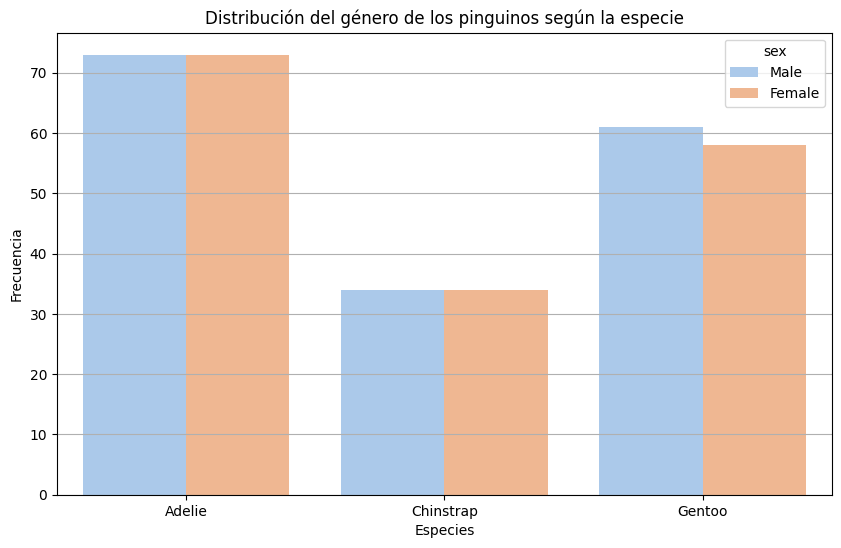

In [15]:
# Distribución del género de los pinguinos según la especie

plt.figure(figsize=(10, 6))

sns.countplot(data=df, x="species", hue="sex", palette="pastel")
plt.title("Distribución del género de los pinguinos según la especie")
plt.xlabel("Especies")
plt.ylabel("Frecuencia")
plt.grid(True, axis="y")
plt.show()

Las tres especies presentan una distribución equitativa de género.

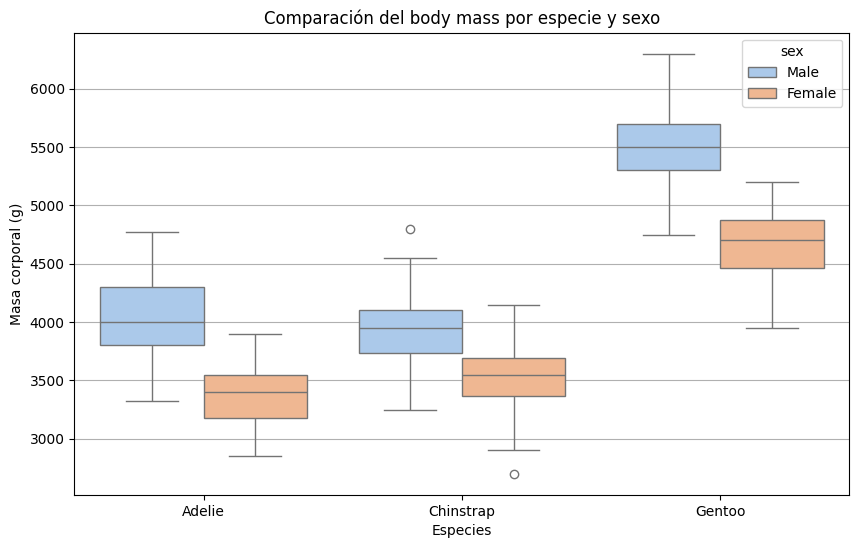

In [16]:
# Comparación via boxplot del body mass por especie y sexo

plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x="species", y="body_mass_g", hue="sex", palette="pastel")
plt.title("Comparación del body mass por especie y sexo")
plt.xlabel("Especies")
plt.ylabel("Masa corporal (g)")
plt.grid(True, axis="y")
plt.show()

En todas las especies, los machos son más pesados que las hembras. Gentoo es claramente la especie con mayor masa corporal, seguida de Chinstrap y Adelie.

La diferencia de masa entre sexos es más pronunciada en la especie Gentoo.

Hay algunos outliers en la especie Chinstrap, con ejemplares masculinos con más masa que el resto de su especie, y ejemplares masculinos con mucho menor peso que el resto de su especie.